In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [81]:
# Path to the JSON file
file_path = './posterior_samples.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python dictionary containing the parsed JSON
print(data)

{'cov_eigen_values_1': [[0.8996802556551041, 0.26111438574734014, 0.19396365630719176, 0.23654032093277486, 0.1442675046868297, 0.07279024788946592, 0.03564057390877534, 0.020470408825599997], [0.7758163947276926, 0.2727547062605519, 0.17613886778967572, 0.2565377429367889, 0.13880740485119208, 0.06304405762417241, 0.03436460056676367, 0.020847216886696], [0.9860724900913155, 0.23054539038356844, 0.1767528805617706, 0.2239818714701269, 0.15424414207477938, 0.06023990345370657, 0.03575861768260533, 0.02095789276846188], [0.8298527209305671, 0.24883076677060093, 0.16410347986174714, 0.2578205496003822, 0.13501401663743956, 0.07039662573740943, 0.03930482101356486, 0.02105500154301445], [0.9322447308189016, 0.24338853773949426, 0.17163759158949565, 0.22084945450521606, 0.13998218833385112, 0.06473854659586806, 0.035475714666554935, 0.019889002804104276], [0.8449850738960365, 0.23689525262005803, 0.16367707907553175, 0.24094081236036613, 0.14309378541291115, 0.06072670699292667, 0.03569756

In [82]:
for key, values in data.items():
    print(key)

cov_eigen_values_1
cov_eigen_values_2
cov_eigen_values_3
mean_data_1
mean_data_2
mean_data_3
mu_1
mu_2
eigen_vectors


In [83]:
cov_eigen_values_1 = np.array(data['cov_eigen_values_1'])
cov_eigen_values_2 = np.array(data['cov_eigen_values_2'])
cov_eigen_values_3 = np.array(data['cov_eigen_values_3'])
mean_data_1        = np.array(data['mean_data_1'])
mean_data_2        = np.array(data['mean_data_2'])
mean_data_3        = np.array(data['mean_data_3'])
eigen_vectors      = np.array(data["eigen_vectors"])
mu_1               = np.array(data["mu_1"])
mu_2               = np.array(data["mu_2"])

In [84]:
mean_mu_1 = np.mean(mu_1)
std_mu_1 = np.std(mu_1)
mean_mu_2 = np.mean(mu_2)
std_mu_2 = np.std(mu_2)

mean_mu_1, std_mu_1, mean_mu_2, std_mu_2

(0.016472160175047223,
 0.00161633809040881,
 0.00611083659143261,
 0.0015771665276031485)

In [85]:
mean_mean_1 = np.mean(mean_data_1, axis=0)
mean_std_1 = np.std(mean_data_1, axis=0)
mean_mean_2 = np.mean(mean_data_2, axis=0)
mean_std_2= np.std(mean_data_2, axis=0)
mean_mean_3 = np.mean(mean_data_3, axis=0)
mean_std_3 = np.std(mean_data_3, axis=0)

In [86]:
cov_1 = []
for i in range(cov_eigen_values_1.shape[0]):
    cov = eigen_vectors[0] @ np.diag(cov_eigen_values_1[i,:]) @ eigen_vectors[0].T
    cov_1.append(cov)
cov_1 = np.array(cov_1)
mean_cov_1 = np.mean(cov_1,axis=0)
std_cov_1 = np.std(cov_1,axis=0)
mean_cov_1.shape, std_cov_1.shape

((8, 8), (8, 8))

In [87]:
cov_2 = []
for i in range(cov_eigen_values_2.shape[0]):
    cov = eigen_vectors[1] @ np.diag(cov_eigen_values_2[i,:]) @ eigen_vectors[1].T
    cov_2.append(cov)
cov_2 = np.array(cov_2)
mean_cov_2 = np.mean(cov_2,axis=0)
std_cov_2 = np.std(cov_2,axis=0)
mean_cov_2.shape, std_cov_2.shape


((8, 8), (8, 8))

In [88]:
cov_3 = []
for i in range(cov_eigen_values_2.shape[0]):
    cov = eigen_vectors[2] @ np.diag(cov_eigen_values_3[i,:]) @ eigen_vectors[2].T
    cov_3.append(cov)
cov_3 = np.array(cov_3)
mean_cov_3 = np.mean(cov_3,axis=0)
std_cov_3 = np.std(cov_3,axis=0)
mean_cov_3.shape, std_cov_3.shape

((8, 8), (8, 8))

In [89]:
means =[]
means.append(mean_mean_1)
means.append(mean_mean_2)
means.append(mean_mean_3)
covariances=[]
covariances.append(mean_cov_1)
covariances.append(mean_cov_2)
covariances.append(mean_cov_3)

In [90]:
from scipy.stats import multivariate_normal

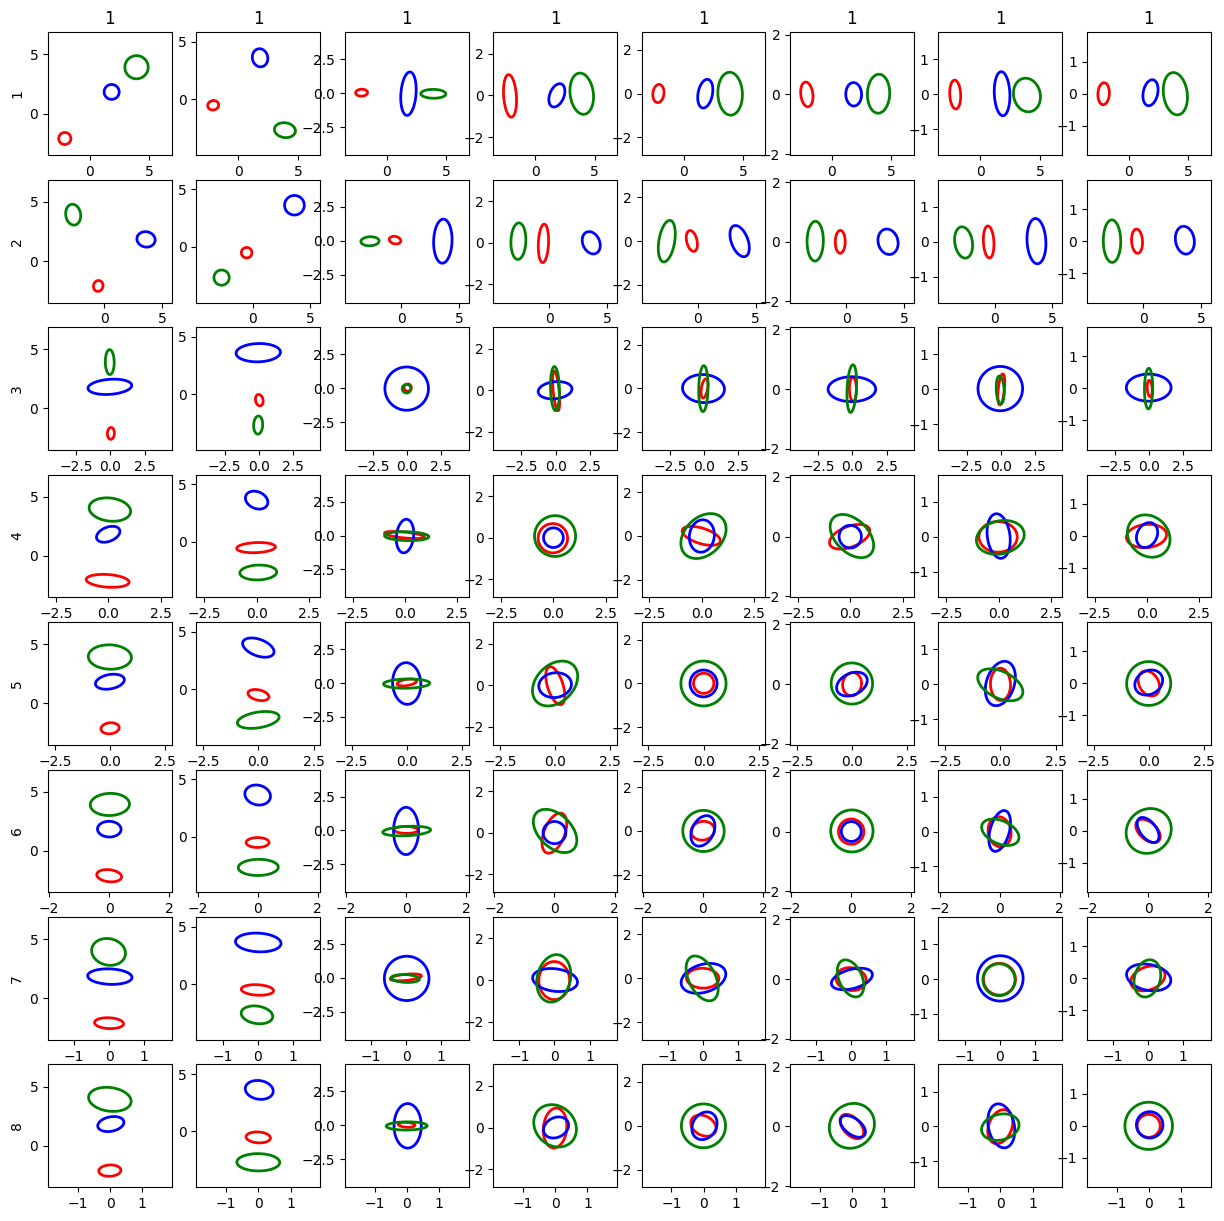

In [117]:


K = 3 # Number of cluster
D = len(means[0])  # 8 Dimesion of feature space

n =3 # how far in terms of std you want to plot

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(15, 15))
label_to_color = {0: 'red', 1: 'green', 2: 'blue'}

for i in range(K):
    # Create different plot of each cluster
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                contour= axes[j][k].contour(x, y, pdf, levels=1,colors=label_to_color[i], linewidths=2)
                
                
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                contour= axes[j][k].contour(x, y, pdf, levels=1, colors=label_to_color[i], linewidths=2)
                
            #
                
            if j==0:
                axes[j][k].set_title(f'feature_{j+1}')
            if k==0:
                axes[j][k].set_ylabel(f'feature_{j+1}')

# Add a legend

plt.show() 